In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

UnboundLocalError: local variable 'tgz_path' referenced before assignment

In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [7]:
strat_test_set["income_cat"].value_counts()

3.0    1447
2.0    1316
4.0     728
5.0     473
1.0     164
Name: income_cat, dtype: int64

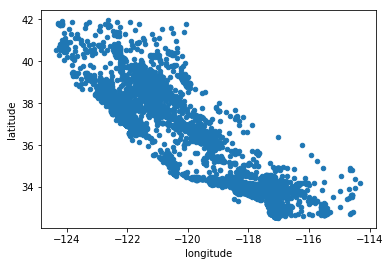

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
train_housing = strat_train_set.copy()
train_housing.plot(kind="scatter", x="longitude", y="latitude")

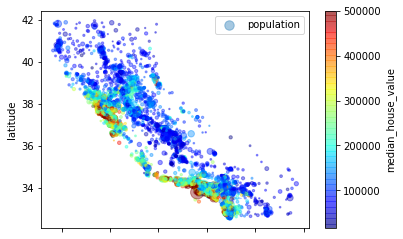

In [9]:
train_housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/200, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

/home/bladeray/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
income_cat            0.642274
Name: median_house_value, dtype: float64

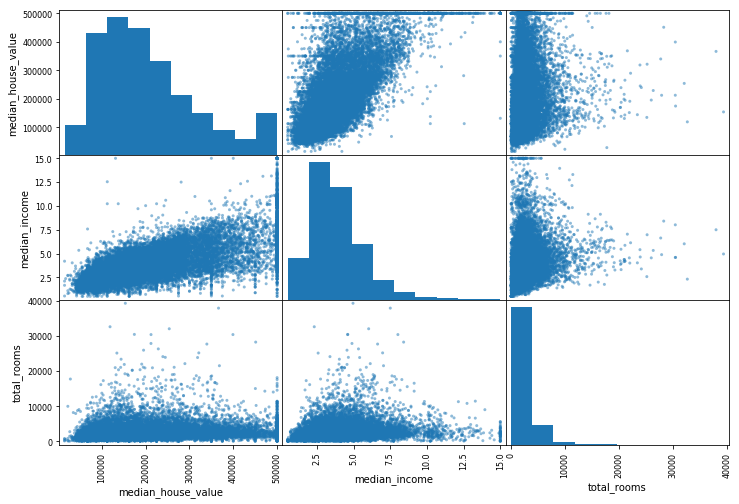

In [15]:
corr_matrix = train_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms"]
scatter_matrix(housing[attributes], figsize=(12, 8))
corr_matrix["median_house_value"]

In [18]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [19]:
train_housing = strat_train_set.drop("median_house_value", axis=1)
train_housing_labels = strat_train_set["median_house_value"].copy()
median = train_housing["total_bedrooms"].median()
train_housing["total_bedrooms"].fillna(median)

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

In [24]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = train_housing.drop("ocean_proximity", axis=1)

X = imputer.fit_transform(housing_num)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  339.    ,    2.7042,
           2.    ],
       [-121.93  ,   37.05  ,   14.    , ...,  113.    ,    6.4214,
           5.    ],
       [-117.2   ,   32.77  ,   31.    , ...,  462.    ,    2.8621,
           2.    ],
       ...,
       [-116.4   ,   34.09  ,    9.    , ...,  765.    ,    3.2723,
           3.    ],
       [-118.01  ,   33.82  ,   31.    , ...,  356.    ,    4.0625,
           3.    ],
       [-122.45  ,   37.77  ,   52.    , ...,  639.    ,    3.575 ,
           3.    ]])

In [27]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat = train_housing["ocean_proximity"]
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_perroom = True):
        self.add_bedrooms_perroom = add_bedrooms_perroom
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_perroom:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_perroom=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [35]:
housing_extra_attribs

array([[-122.23, 37.88, 41.0, ..., 6.984126984126984, 2.5555555555555554,
        0.14659090909090908],
       [-122.22, 37.86, 21.0, ..., 6.238137082601054, 2.109841827768014,
        0.15579659106916466],
       [-122.24, 37.85, 52.0, ..., 8.288135593220339, 2.8022598870056497,
        0.12951601908657123],
       ...,
       [-121.22, 39.43, 17.0, ..., 5.20554272517321, 2.325635103926097,
        0.21517302573203195],
       [-121.32, 39.43, 18.0, ..., 5.329512893982808, 2.1232091690544412,
        0.21989247311827956],
       [-121.24, 39.37, 16.0, ..., 5.254716981132075, 2.616981132075472,
        0.22118491921005387]], dtype=object)

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

class LabelBinarizer_new(TransformerMixin, BaseEstimator):
    def fit(self, X, y = 0):
        self.encoder = None
        return self
    def transform(self, X, y = 0):
        if(self.encoder is None):
            print("Initializing encoder")
            self.encoder = LabelBinarizer();
            result = self.encoder.fit_transform(X)
        else:
            result = self.encoder.transform(X)
        return result
from sklearn.pipeline import FeatureUnion
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
('selector', DataFrameSelector(num_attribs)),
('imputer', Imputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
('selector', DataFrameSelector(cat_attribs)),
('label_binarizer', LabelBinarizer_new()),
])
full_pipeline = FeatureUnion(transformer_list=[
("num_pipeline", num_pipeline),
("cat_pipeline", cat_pipeline),
])
housing_prepared = full_pipeline.fit_transform(train_housing)

Initializing encoder


In [41]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, train_housing_labels)
from sklearn.metrics import mean_squared_error
housing_pre_lin = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(train_housing_labels, housing_pre_lin)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [43]:
from sklearn.tree import DecisionTreeRegressor
tre_reg = DecisionTreeRegressor()
tre_reg.fit(housing_prepared, train_housing_labels)
housing_pre_tre = tre_reg.predict(housing_prepared)
tre_mse = mean_squared_error(train_housing_labels, housing_pre_tre)
tre_rmse = np.sqrt(tre_mse)
tre_rmse

0.0

In [55]:
from sklearn.model_selection import cross_val_score
tre_sco = cross_val_score(tre_reg, housing_prepared, train_housing_labels,
                          cv = 10)
lin_sco = cross_val_score(lin_reg, housing_prepared, train_housing_labels,
                          cv = 10)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tre_sco)
display_scores(lin_sco)

Scores: [0.6110583  0.68248116 0.62821696 0.65202871 0.62413903 0.59008513
 0.62084316 0.6434683  0.5727504  0.60116414]
Mean: 0.6226235298584843
Standard deviation: 0.030098494867670845
Scores: [0.62705132 0.67708444 0.62326807 0.60162341 0.65560945 0.63665759
 0.68254405 0.66870139 0.63113924 0.64780129]
Mean: 0.6451480248038722
Standard deviation: 0.02461420025921894


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
par_gri = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
for_reg = RandomForestRegressor()
gri_sea = GridSearchCV(for_reg, par_gri, cv = 5, scoring = 'neg_mean_squared_error')
gri_sea.fit(housing_prepared, train_housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [59]:
gri_sea.best_params_

{'max_features': 8, 'n_estimators': 30}

In [60]:
gri_sea.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [62]:
from sklearn.model_selection import RandomizedSearchCV
param_ran={'n_estimators':range(30,50),'max_features': range(3,8)}
forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg,param_ran,cv=5,scoring='neg_mean_squared_error',n_iter=10)
random_search.fit(housing_prepared, train_housing_labels)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': range(30, 50), 'max_features': range(3, 8)},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [66]:
feature_importances = random_search.best_estimator_.feature_importances_

In [67]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2969173670212176, 'median_income'),
 (0.14061158562951492, 'INLAND'),
 (0.1185343173547009, 'income_cat'),
 (0.10875007405064388, 'pop_per_hhold'),
 (0.06598359449735497, 'longitude'),
 (0.06136477961155046, 'latitude'),
 (0.04600678079859177, 'bedrooms_per_room'),
 (0.044515423250820925, 'housing_median_age'),
 (0.03702692283927992, 'rooms_per_hhold'),
 (0.017638046090603387, 'total_rooms'),
 (0.016686278589876227, 'households'),
 (0.01614589036514184, 'population'),
 (0.01564433978287897, 'total_bedrooms'),
 (0.007923360795957806, '<1H OCEAN'),
 (0.003922290417684527, 'NEAR OCEAN'),
 (0.0022987231323349936, 'NEAR BAY'),
 (3.0225771846898793e-05, 'ISLAND')]

In [69]:
final_model = random_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [70]:
final_rmse

48504.73447880924